# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Churn Prediction</span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,1
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,1
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15566494,487,France,Male,45,2,0.0,2,1,0,77475.73,0
15566958,667,Spain,Male,39,7,167557.12,1,1,1,41183.02,0
15567422,630,France,Male,42,6,0.0,2,1,0,162697.93,0
15567437,734,Germany,Female,30,7,123040.38,1,1,1,76503.06,0
15567778,690,Germany,Female,54,1,144027.8,1,1,1,108731.02,1
15567839,501,France,Male,42,9,114631.23,1,0,1,91429.74,0
15567446,646,Germany,Male,39,9,111574.41,1,1,1,30838.51,0
15566843,535,Germany,Male,20,9,134874.4,1,1,1,118825.56,0
15566378,515,France,Male,48,5,129387.94,1,0,1,147955.91,1
15566139,526,France,Female,37,5,53573.18,1,1,0,62830.97,0


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.5 for 'MICRO-RECALL', early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.50,
                     max_runtime_secs=100,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
credit_score,BIGINT,8000,0,None,0,8000,0,0.0,100.0
country,VARCHAR(256) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
tenure,BIGINT,8000,0,None,324,7676,0,0.0,100.0
credit_card,BIGINT,8000,0,None,2368,5632,0,0.0,100.0
balance,FLOAT,8000,0,None,2913,5087,0,0.0,100.0
products_number,BIGINT,8000,0,None,0,8000,0,0.0,100.0


        customer_id  credit_score       age    tenure     balance  products_number  credit_card  active_member  estimated_salary     churn
func                                                                                                                                      
min    1.556570e+07       350.000    18.000     0.000       0.000            1.000        0.000          0.000            11.580     0.000
std    7.206642e+04        96.876    10.490     2.893   62537.230            0.581        0.457          0.500         57477.609     0.402
25%    1.562812e+07       583.000    32.000     3.000       0.000            1.000        0.000          0.000         52013.040     0.000
50%    1.569191e+07       652.000    37.000     5.000   97267.100            1.000        1.000          1.000        100839.505     0.000
75%    1.575293e+07       718.000    44.000     8.000  127611.333            2.000        1.000          1.000        149748.318     0.000
max    1.581569e+07       8

func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
std,72066.421,96.876,10.49,2.893,62537.23,0.581,0.457,0.5,57477.609,0.402
25%,15628120.25,583,32,3,0,1,0,0,52013.04,0
50%,15691908,652,37,5,97267.1,1,1,1,100839.505,0
75%,15752925.25,718,44,8,127611.333,2,1,1,149748.318,0
max,15815690,850,92,10,250898.09,4,1,1,199970.74,1
min,15565701,350,18,0,0,1,0,0,11.58,0
mean,15691040.312,650.796,38.801,5.032,76353.76,1.531,0.704,0.515,100781.929,0.203
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


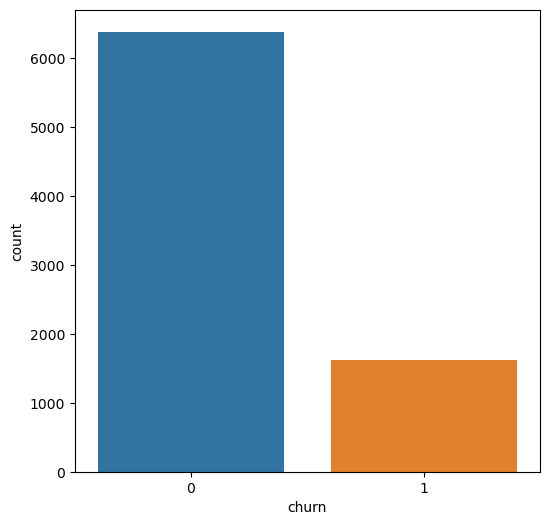

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.5500
1  products_number             0.5875
2     credit_score             0.1125
3            churn            20.2625


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


['country', 'gender']


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15748589,736,1,0,0,1,0,30,9,0.0,2,1,0,34180.33,0,28
15664615,689,0,1,0,1,0,30,5,136650.89,1,1,1,41865.72,1,44
15769246,813,0,1,0,0,1,59,2,135078.41,1,1,0,187636.06,1,52
15748854,723,0,1,0,1,0,28,5,91938.31,1,1,0,143481.85,0,60
15684395,446,0,0,1,1,0,45,10,125191.69,1,1,1,128260.86,1,76
15677217,705,1,0,0,0,1,30,1,0.0,1,1,1,181300.32,0,84
15712903,499,1,0,0,1,0,21,3,176511.08,1,1,1,153920.22,0,68
15791045,568,1,0,0,1,0,38,3,132951.92,1,0,1,124486.28,0,36
15685476,658,1,0,0,0,1,31,5,100082.14,1,0,1,49809.88,0,20
15614716,515,1,0,0,1,0,37,0,196853.62,1,1,1,132770.11,0,12


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0  products_number             0.5875
1            churn            20.2625
2              age             3.5500
3     credit_score             0.1125


['credit_score', 'age', 'products_number']


customer_id,credit_score,country_0,country_1,country_2,gender_0,gender_1,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,id
15748589,736,1,0,0,1,0,30,9,0.0,2,1,0,34180.33,0,28
15664615,689,0,1,0,1,0,30,5,136650.89,1,1,1,41865.72,1,44
15769246,813,0,1,0,0,1,59,2,135078.41,1,1,0,187636.06,1,52
15748854,723,0,1,0,1,0,28,5,91938.31,1,1,0,143481.85,0,60
15684395,446,0,0,1,1,0,45,10,125191.69,1,1,1,128260.86,1,76
15677217,705,1,0,0,0,1,30,1,0.0,1,1,1,181300.32,0,84
15712903,499,1,0,0,1,0,21,3,176511.08,1,1,1,153920.22,0,68
15791045,568,1,0,0,1,0,38,3,132951.92,1,0,1,124486.28,0,36
15685476,658,1,0,0,0,1,31,5,100082.14,1,0,1,49809.88,0,20
15614716,515,1,0,0,1,0,37,0,196853.62,1,1,1,132770.11,0,12


['customer_id', 'country_2', 'balance', 'estimated_salary', 'products_number', 'credit_score', 'country_1', 'tenure', 'active_member', 'gender_1', 'credit_card', 'country_0', 'age', 'gender_0']


['customer_id', 'balance', 'estimated_salary', 'products_number', 'credit_score', 'tenure', 'active_member', 'credit_card', 'age']


country_2,country_1,churn,gender_1,id,country_0,gender_0,customer_id,balance,estimated_salary,products_number,credit_score,tenure,active_member,credit_card,age
0,1,1,0,2,0,1,0.9644704366992147,0.44751875153772597,0.7012109872836034,1.0,0.9657387580299786,0.8,0.0,1.0,0.8863636363636364
0,0,0,0,4,1,1,0.19606862701958885,0.7845959289686103,0.66392822414337,0.0,0.2826552462526767,0.0,1.0,1.0,0.4318181818181818
0,0,1,0,5,1,1,0.49306969506658294,0.0,0.1249613671111641,0.0,0.7451820128479657,1.0,1.0,1.0,0.7727272727272727
0,1,1,1,6,0,0,0.07265119665265271,0.569738015941054,0.9365358906288666,0.0,0.6381156316916489,0.8,0.0,0.0,0.7045454545454546
0,1,0,0,8,0,1,0.5469880674749689,0.4016840064426158,0.27223974135518475,0.5,0.4346895074946467,0.9,1.0,1.0,0.8636363636363636
1,0,1,1,9,0,0,0.553432351023445,0.5224368985830065,0.5968077681462555,0.5,0.7002141327623126,0.3,0.0,1.0,1.0
0,0,1,0,7,1,1,0.9765429678905871,0.43725131586294663,0.10134714508702676,0.0,0.7387580299785867,0.2,0.0,1.0,0.6363636363636364
1,0,0,0,3,0,1,0.15153066734936338,0.0,0.670066577595145,0.0,0.39828693790149894,0.3,0.0,1.0,0.36363636363636365
0,0,0,1,1,1,0,0.4123141418222402,0.5211163624242815,0.7192366681276318,0.0,0.8008565310492506,0.3,0.0,1.0,0.6590909090909091
1,0,0,0,0,0,1,0.14883854889615142,0.0,0.8312337879394973,0.5,0.4732334047109208,1.0,1.0,1.0,0.5227272727272727


['customer_id', 'gender_0', 'credit_score', 'country_0', 'age', 'country_2', 'products_number', 'country_1', 'tenure', 'active_member', 'gender_1', 'balance', 'estimated_salary']


['r_customer_id', 'r_credit_score', 'r_age', 'r_products_number', 'r_tenure', 'r_active_member', 'r_balance', 'r_estimated_salary']


r_gender_1,r_country_0,churn,r_country_2,r_country_1,id,r_gender_0,r_customer_id,r_credit_score,r_age,r_products_number,r_tenure,r_active_member,r_balance,r_estimated_salary
0,0,1,0,1,2,1,0.9644704366992147,0.9657387580299786,0.8863636363636364,1.0,0.8,0.0,0.44751875153772597,0.7012109872836034
0,1,0,0,0,4,1,0.19606862701958885,0.2826552462526767,0.4318181818181818,0.0,0.0,1.0,0.7845959289686103,0.66392822414337
0,1,1,0,0,5,1,0.49306969506658294,0.7451820128479657,0.7727272727272727,0.0,1.0,1.0,0.0,0.1249613671111641
1,0,1,0,1,6,0,0.07265119665265271,0.6381156316916489,0.7045454545454546,0.0,0.8,0.0,0.569738015941054,0.9365358906288666
0,0,0,0,1,8,1,0.5469880674749689,0.4346895074946467,0.8636363636363636,0.5,0.9,1.0,0.4016840064426158,0.27223974135518475
1,0,1,1,0,9,0,0.553432351023445,0.7002141327623126,1.0,0.5,0.3,0.0,0.5224368985830065,0.5968077681462555
0,1,1,0,0,7,1,0.9765429678905871,0.7387580299785867,0.6363636363636364,0.0,0.2,0.0,0.43725131586294663,0.10134714508702676
0,0,0,1,0,3,1,0.15153066734936338,0.39828693790149894,0.36363636363636365,0.0,0.3,0.0,0.0,0.670066577595145
1,1,0,0,0,1,0,0.4123141418222402,0.8008565310492506,0.6590909090909091,0.0,0.3,0.0,0.5211163624242815,0.7192366681276318
0,0,0,1,0,0,1,0.14883854889615142,0.4732334047109208,0.5227272727272727,0.5,1.0,1.0,0.0,0.8312337879394973


['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


country_2,gender_0,country_1,churn,id,country_0,gender_1,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1,1,0,0,11,0,0,0.15153066734936338,0.39828693790149894,0.36363636363636365,0.3,0.0,0.0,1.0,0.0,0.670066577595145
0,1,0,1,13,1,0,0.49306969506658294,0.7451820128479657,0.7727272727272727,1.0,0.0,0.0,1.0,1.0,0.1249613671111641
1,1,0,0,21,0,0,0.5636287996671854,0.8072805139186295,0.3409090909090909,0.1,0.47076595919881253,0.5,0.0,1.0,0.7834031209172914
0,1,0,0,12,1,0,0.19606862701958885,0.2826552462526767,0.4318181818181818,0.0,0.7845959289686103,0.0,1.0,1.0,0.66392822414337
0,1,0,1,15,1,0,0.9765429678905871,0.7387580299785867,0.6363636363636364,0.2,0.43725131586294663,0.0,1.0,0.0,0.10134714508702676
0,1,0,0,23,1,0,0.40774594082139615,0.49036402569593146,0.45454545454545453,0.1,0.0,0.5,1.0,1.0,0.04599754269821897
0,0,1,1,14,0,1,0.07265119665265271,0.6381156316916489,0.7045454545454546,0.8,0.569738015941054,0.0,0.0,0.0,0.9365358906288666
1,0,0,0,22,0,1,0.4568521014924657,0.6038543897216274,0.5227272727272727,0.8,0.0,0.5,1.0,0.0,0.660838643250952
0,0,0,0,9,1,1,0.4123141418222402,0.8008565310492506,0.6590909090909091,0.3,0.5211163624242815,0.0,1.0,0.0,0.7192366681276318
1,0,0,1,17,0,1,0.553432351023445,0.7002141327623126,1.0,0.3,0.5224368985830065,0.5,1.0,0.0,0.5968077681462555


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : churn                                                                                                                               
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : xgboost
model_type : Classification
colu

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.881659,0.881659,0.881659,0.881659,0.881689,0.881661,0.881657,0.881690,0.881659,0.881657
1,2,KNN_9,lasso,0.877999,0.877999,0.877999,0.877999,0.878958,0.878009,0.877924,0.878965,0.877999,0.877923
2,3,KNN_0,lasso,0.876373,0.876373,0.876373,0.876373,0.876539,0.876377,0.876360,0.876542,0.876373,0.876359
3,4,DECISIONFOREST_3,lasso,0.845872,0.845872,0.845872,0.845872,0.845954,0.845875,0.845864,0.845956,0.845872,0.845864
4,5,XGBOOST_2,pca,0.814090,0.814090,0.814090,0.814090,0.700193,0.618003,0.637480,0.787236,0.814090,0.790487
5,6,DECISIONFOREST_2,pca,0.809524,0.809524,0.809524,0.809524,0.689906,0.579091,0.590620,0.774230,0.809524,0.771640
6,7,DECISIONFOREST_1,rfe,0.785279,0.785279,0.785279,0.785279,0.812340,0.785338,0.780549,0.812377,0.785279,0.780536
7,8,DECISIONFOREST_0,lasso,0.785279,0.785279,0.785279,0.785279,0.812340,0.785338,0.780549,0.812377,0.785279,0.780536
8,9,KNN_8,pca,0.761905,0.761905,0.761905,0.761905,0.582661,0.558122,0.563174,0.728287,0.761905,0.741340
9,10,XGBOOST_0,lasso,0.738918,0.738918,0.738918,0.738918,0.760517,0.738860,0.733361,0.760487,0.738918,0.733377


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.881659,0.881659,0.881659,0.881659,0.881689,0.881661,0.881657,0.881690,0.881659,0.881657
1,2,KNN_9,lasso,0.877999,0.877999,0.877999,0.877999,0.878958,0.878009,0.877924,0.878965,0.877999,0.877923
2,3,KNN_0,lasso,0.876373,0.876373,0.876373,0.876373,0.876539,0.876377,0.876360,0.876542,0.876373,0.876359
3,4,DECISIONFOREST_3,lasso,0.845872,0.845872,0.845872,0.845872,0.845954,0.845875,0.845864,0.845956,0.845872,0.845864
4,5,XGBOOST_2,pca,0.814090,0.814090,0.814090,0.814090,0.700193,0.618003,0.637480,0.787236,0.814090,0.790487
5,6,DECISIONFOREST_2,pca,0.809524,0.809524,0.809524,0.809524,0.689906,0.579091,0.590620,0.774230,0.809524,0.771640
6,7,DECISIONFOREST_1,rfe,0.785279,0.785279,0.785279,0.785279,0.812340,0.785338,0.780549,0.812377,0.785279,0.780536
7,8,DECISIONFOREST_0,lasso,0.785279,0.785279,0.785279,0.785279,0.812340,0.785338,0.780549,0.812377,0.785279,0.780536
8,9,KNN_8,pca,0.761905,0.761905,0.761905,0.761905,0.582661,0.558122,0.563174,0.728287,0.761905,0.741340
9,10,XGBOOST_0,lasso,0.738918,0.738918,0.738918,0.738918,0.760517,0.738860,0.733361,0.760487,0.738918,0.733377


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,KNN_4,rfe,0.881659,0.881659,0.881659,0.881659,0.881689,0.881661,0.881657,0.88169,0.881659,0.881657


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=1)

{'response_column': 'churn',
 'name': 'knn',
 'model_type': 'Classification',
 'k': 3,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [20]:
aml.model_hyperparameters(rank=5)

{'response_column': 'churn',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(bank_df_test, rank=2)

Data Transformation started ...


customer_id,balance,estimated_salary,products_number,gender,tenure,active_member,country,credit_card,id,credit_score,age,churn
15574523,0.0,68814.23,2,Male,1,1,France,1,12,576,39,0
15609618,154475.54,101300.94,2,Male,9,1,Germany,0,10,721,28,1
15576216,108862.76,79555.08,1,Female,4,0,Germany,1,18,655,37,1
15642816,43658.33,3025.49,2,Female,7,1,France,1,15,850,27,0
15721019,110495.27,158615.41,1,Female,3,0,France,1,14,687,24,0
15609475,98544.11,52327.57,1,Female,7,1,Spain,1,22,604,39,0
15566958,167557.12,41183.02,1,Male,7,1,Spain,1,9,667,39,0
15591428,0.0,172097.4,2,Male,9,0,France,0,17,781,29,0
15629133,0.0,126838.7,2,Female,9,0,France,1,13,579,27,0
15589348,137204.77,28865.59,1,Male,4,1,Spain,1,21,850,37,0


customer_id,balance,estimated_salary,products_number,gender_0,gender_1,tenure,active_member,country_0,country_1,country_2,credit_card,id,credit_score,age,churn
15714493,0.0,95500.98,2,1,0,6,1,0,0,1,1,25,465,33,0
15643916,62400.48,132498.39,1,0,1,8,1,0,0,1,1,41,619,46,1
15660535,0.0,179843.33,2,1,0,5,1,1,0,0,1,49,680,47,0
15775627,0.0,67431.28,2,0,1,8,1,1,0,0,0,57,509,35,0
15794204,108116.66,27411.19,1,0,1,7,1,1,0,0,1,73,687,28,0
15802381,63663.93,167784.28,1,1,0,5,1,0,1,0,0,81,461,34,0
15790717,0.0,160387.98,2,0,1,7,0,0,0,1,1,65,695,35,0
15572626,0.0,15627.51,2,0,1,8,1,0,0,1,1,33,620,44,0
15591428,0.0,172097.4,2,0,1,9,0,1,0,0,0,17,781,29,0
15566958,167557.12,41183.02,1,0,1,7,1,0,0,1,1,9,667,39,0


id,customer_id,country_2,balance,estimated_salary,products_number,credit_score,country_1,tenure,active_member,gender_1,credit_card,country_0,age,gender_0,churn
26,15607986,0,139930.18,105720.09,1,555,0,10,1,1,1,1,40,0,0
42,15659149,0,0.0,197923.05,2,530,0,2,0,1,1,1,39,0,0
50,15630641,0,127103.97,41516.44,1,846,0,6,1,0,1,1,37,1,0
58,15614878,0,180520.29,123850.58,1,660,1,6,1,0,1,0,29,1,0
74,15669589,0,95039.12,116471.14,1,491,1,1,1,0,0,0,68,1,1
82,15625175,0,97067.69,60920.03,1,742,1,6,1,0,0,0,43,1,1
66,15765982,0,74135.85,11783.1,1,735,0,7,1,1,1,1,41,0,1
34,15650034,0,0.0,162428.05,1,564,0,1,1,0,1,1,28,1,0
18,15576216,0,108862.76,79555.08,1,655,1,4,0,0,1,0,37,1,1
10,15609618,0,154475.54,101300.94,2,721,1,9,1,1,0,0,28,0,1


country_2,country_1,churn,gender_1,id,country_0,gender_0,customer_id,balance,estimated_salary,products_number,credit_score,tenure,active_member,credit_card,age
0,0,0,1,11,1,0,0.23147018468812627,0.1854166765478366,0.48347707601892304,0.0,0.708779443254818,0.9,1.0,1.0,0.5
0,1,1,1,10,0,0,0.1756757297321082,0.6156903785118493,0.5065502375585095,0.5,0.7237687366167024,0.9,1.0,0.0,0.22727272727272727
0,1,1,0,18,0,1,0.042061850721431746,0.4338923425044806,0.39779873050076825,0.0,0.582441113490364,0.4,0.0,1.0,0.4318181818181818
0,0,0,1,12,1,0,0.03528955274032058,0.0,0.34408351185312036,0.5,0.4132762312633833,0.1,1.0,1.0,0.4772727272727273
0,0,0,0,15,1,1,0.30847357283720483,0.17400821983140646,0.015072627830603008,0.5,1.0,0.7,1.0,1.0,0.20454545454545456
0,0,0,1,23,1,0,0.651316657932949,0.5745268128585594,0.07390669174645462,0.0,0.29764453961456105,0.5,1.0,1.0,0.5227272727272727
0,1,0,1,8,0,0,0.9523979055078423,0.3576307017721817,0.1864545740240157,0.5,0.5460385438972163,0.2,1.0,1.0,0.4318181818181818
0,1,0,0,16,0,1,0.6081667593374108,0.4385489343501977,0.6700568756140004,0.5,0.5481798715203426,1.0,1.0,1.0,0.6363636363636364
0,0,0,0,14,1,1,0.6212993371708355,0.440399008218835,0.7931811175842107,0.0,0.6509635974304069,0.3,0.0,1.0,0.13636363636363635
1,0,0,0,22,0,1,0.17510370456300078,0.39276548498236874,0.26163337553528426,0.0,0.4732334047109208,0.7,1.0,1.0,0.4772727272727273


id,customer_id,gender_0,credit_score,country_0,age,country_2,products_number,country_1,tenure,active_member,gender_1,balance,estimated_salary,churn
24,15603378,1,768,1,36,0,1,0,3,1,0,141334.95,125870.5,0
40,15704583,0,651,1,56,0,1,0,2,0,1,0.0,114522.68,1
48,15652400,0,667,0,56,1,1,0,2,1,1,168883.08,18897.78,0
56,15723873,0,657,0,31,1,1,0,3,0,1,125167.02,98820.39,0
72,15662085,1,678,1,32,0,1,0,9,1,0,0.0,148210.64,0
80,15567446,0,646,0,39,0,1,1,9,1,1,111574.41,30838.51,0
64,15644446,1,672,1,28,0,1,0,6,1,0,0.0,8814.69,0
32,15771856,1,632,0,32,1,2,0,1,0,0,0.0,19525.65,0
16,15717736,1,639,0,46,0,2,1,10,1,0,110031.09,133995.59,0
8,15803790,0,638,0,37,0,2,1,2,1,1,89728.86,37294.88,0


r_gender_1,r_country_0,churn,r_country_2,r_country_1,id,r_gender_0,r_customer_id,r_credit_score,r_age,r_products_number,r_tenure,r_active_member,r_balance,r_estimated_salary
1,0,1,0,1,10,0,0.1756757297321082,0.7237687366167024,0.22727272727272727,0.5,0.9,1.0,0.6156903785118493,0.5065502375585095
0,1,0,0,0,14,1,0.6212993371708355,0.6509635974304069,0.13636363636363635,0.0,0.3,0.0,0.440399008218835,0.7931811175842107
0,0,0,1,0,22,1,0.17510370456300078,0.4732334047109208,0.4772727272727273,0.0,0.7,1.0,0.39276548498236874,0.26163337553528426
0,1,0,0,0,13,1,0.253739164523239,0.4197002141327623,0.20454545454545456,0.5,0.9,0.0,0.0,0.6342651169368785
0,1,0,0,0,15,1,0.30847357283720483,1.0,0.20454545454545456,0.5,0.7,1.0,0.17400821983140646,0.015072627830603008
1,1,0,0,0,23,0,0.651316657932949,0.29764453961456105,0.5227272727272727,0.0,0.5,1.0,0.5745268128585594,0.07390669174645462
1,1,0,0,0,11,0,0.23147018468812627,0.708779443254818,0.5,0.0,0.9,1.0,0.1854166765478366,0.48347707601892304
1,0,0,0,1,19,0,0.3291104808611579,0.5738758029978587,0.18181818181818182,0.0,0.5,0.0,0.5860439989798248,0.7089031580248688
1,0,0,1,0,9,0,0.005028221241734636,0.6081370449678801,0.4772727272727273,0.0,0.7,1.0,0.6678293963895859,0.20589924462575254
1,1,0,0,0,17,0,0.10291252815123865,0.8522483940042827,0.25,0.5,0.9,0.0,0.0,0.8606048355074106


country_2,gender_0,churn,country_1,id,country_0,gender_1,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0,0,0,11,1,1,0.23147018468812627,0.708779443254818,0.5,0.9,0.1854166765478366,0.0,1.0,1.0,0.48347707601892304
1,0,0,0,9,0,1,0.005028221241734636,0.6081370449678801,0.4772727272727273,0.7,0.6678293963895859,0.0,1.0,1.0,0.20589924462575254
0,0,0,0,17,1,1,0.10291252815123865,0.8522483940042827,0.25,0.9,0.0,0.5,0.0,0.0,0.8606048355074106
0,0,0,0,12,1,1,0.03528955274032058,0.4132762312633833,0.4772727272727273,0.1,0.0,0.5,1.0,1.0,0.34408351185312036
0,1,0,0,13,1,0,0.253739164523239,0.4197002141327623,0.20454545454545456,0.9,0.0,0.5,1.0,0.0,0.6342651169368785
1,0,0,0,21,0,1,0.09459216205513042,1.0,0.4318181818181818,0.4,0.54685458147569,0.0,1.0,1.0,0.14429951596115925
0,1,0,0,15,1,0,0.30847357283720483,1.0,0.20454545454545456,0.7,0.17400821983140646,0.5,1.0,1.0,0.015072627830603008
0,0,0,0,23,1,1,0.651316657932949,0.29764453961456105,0.5227272727272727,0.5,0.5745268128585594,0.0,1.0,1.0,0.07390669174645462
0,1,0,0,14,1,0,0.6212993371708355,0.6509635974304069,0.13636363636363635,0.3,0.440399008218835,0.0,1.0,0.0,0.7931811175842107
1,1,0,0,22,0,0,0.17510370456300078,0.4732334047109208,0.4772727272727273,0.7,0.39276548498236874,0.0,1.0,1.0,0.26163337553528426


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,8,-0.633621,0.662252,-0.322559,-0.757257,-0.244022,0.323401,-0.538847,0.277314,-0.170517,0.035164,0
1,9,-0.691257,0.614178,0.757862,-0.063569,-0.382643,-0.607080,0.383701,0.236918,0.023229,-0.062681,0
2,10,-0.627789,0.697176,-0.282603,-0.755262,0.724945,0.152941,0.551219,0.136915,0.019643,-0.211484,1
3,11,-0.674357,-0.609643,0.156652,-0.423394,-0.309983,-0.226212,0.455286,-0.009725,-0.118791,-0.095253,0
4,12,-0.667859,-0.640906,0.220572,-0.413026,-0.309421,0.079562,-0.031830,0.401422,0.564810,0.188858,0
5,13,0.778046,-0.654790,-0.242630,0.440043,-0.302355,0.299060,0.483923,0.016560,0.040136,0.108900,0
6,14,0.779289,-0.597093,-0.326019,0.372357,-0.259090,-0.218892,-0.222747,-0.373972,0.088093,-0.160151,0
7,15,0.736164,-0.635393,0.262694,-0.440318,-0.345151,0.089858,0.224340,0.540543,-0.116753,-0.469159,0
8,16,0.775784,0.663076,-0.292756,-0.772987,-0.285458,0.358690,0.362127,-0.145343,-0.280594,0.060505,0
9,17,-0.621071,-0.630260,-0.209559,0.466291,0.717492,0.326197,0.632117,-0.123225,0.226956,-0.291841,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : KNN_9 
Feature Selection Method : lasso

Prediction : 
   id  prediction    prob_1    prob_0  churn
0  14           0  1.000000  0.000000      0
1  12           0  1.000000  0.000000      0
2  29           0  0.686682  0.313318      0
3  28           0  1.000000  0.000000      0
4  22           0  0.793589  0.206411      0
5  27           1  0.000000  1.000000      1
6  41           0  0.561400  0.438600      1
7  48           0  0.797733  0.202267      0
8  10           0  1.000000  0.000000      1
9  15           0  1.000000  0.000000      0

ROC-AUC : 


AUC,GINI
0.18366204108391607,-0.6326759178321679


threshold_value,tpr,fpr
0.04081632653061224,0.8701923076923077,0.9873737373737373
0.08163265306122448,0.8701923076923077,0.9873737373737373
0.1020408163265306,0.8701923076923077,0.9873737373737373
0.12244897959183673,0.8677884615384616,0.9861111111111112
0.16326530612244897,0.8557692307692307,0.9842171717171717
0.18367346938775508,0.8052884615384616,0.9772727272727273
0.14285714285714285,0.8677884615384616,0.985479797979798
0.061224489795918366,0.8701923076923077,0.9873737373737373
0.02040816326530612,0.8701923076923077,0.9873737373737373
0.0,1.0,1.0



Confusion Matrix : 


array([[1420,  164],
       [ 216,  200]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob_1,prob_0,churn
10,0,1.0,0.0,1
12,0,1.0,0.0,0
13,0,1.0,0.0,0
14,0,1.0,0.0,0
16,0,0.6276070701631241,0.372392929836876,0
17,0,1.0,0.0,0
15,0,1.0,0.0,0
11,0,1.0,0.0,0
9,0,1.0,0.0,0
8,0,0.754524363767377,0.2454756362326229,0


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bank_df_test, rank=2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : KNN_9 
Feature Selection Method : lasso

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1     1420      216   0.867971  0.896465  0.881988     1584
1               1  CLASS_2      164      200   0.549451  0.480769  0.512821      416
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.810000
1       5     Macro-Precision     0.708711
2       6        Macro-Recall     0.688617
3       7            Macro-F1     0.697404
4       9     Weighted-Recall     0.810000
5      10         Weighted-F1     0.805201
6       8  Weighted-Precision     0.801718
7       4            Micro-F1     0.810000
8     

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,1420,216,0.8679706601466992,0.8964646464646465,0.8819875776397514,1584
1,1,CLASS_2,164,200,0.5494505494505495,0.4807692307692308,0.5128205128205129,416


In [25]:
remove_context()

True